## $k$-Nearest Neighbor


Der k-Nearest-Neighbors-Algorithmus, kurz k-NN, ist ein einfacher, aber leistungsstarker Algorithmus, der sowohl für Klassifikations- als auch für Regressionsprobleme eingesetzt werden kann. Er basiert auf der Annahme, dass ähnliche Datenpunkte nahe beieinander liegen. Die Klassifizierung oder Vorhersage eines neuen Datenpunktes erfolgt anhand der Mehrheitsentscheidung seiner k-nächsten Nachbarn.

### Funktionsweise des k-NN-Algorithmus

Der k-NN-Algorithmus arbeitet in zwei Phasen. In der ersten Phase, der sogenannten Trainingsphase, werden alle Trainingsdaten gespeichert. Eine eigentliche Modellbildung findet nicht statt. In der Vorhersagephase wird für einen neuen Datenpunkt die Distanz zu allen gespeicherten Datenpunkten berechnet. Dabei wird meist die euklidische Distanz verwendet, es können jedoch auch andere Distanzmaße zum Einsatz kommen. Anschließend werden die k nächstgelegenen Nachbarn des neuen Datenpunkts ermittelt. Die Klassifikation erfolgt durch eine Mehrheitsentscheidung dieser Nachbarn, während bei einer Regression der Durchschnitt der Nachbarwerte berechnet wird.

### Parameterwahl

Eine entscheidende Rolle für die Leistungsfähigkeit des Algorithmus spielt die Wahl der Parameter. Die Anzahl der Nachbarn, also der k-Wert, beeinflusst das Ergebnis maßgeblich. Ein kleiner Wert für k kann zu einer hohen Anfälligkeit für Ausreißer führen, während ein großer k-Wert möglicherweise relevante lokale Strukturen in den Daten verwischt. Darüber hinaus beeinflusst die Wahl des Distanzmaßes die Berechnung der Ähnlichkeit zwischen den Datenpunkten. Häufig wird die euklidische Distanz verwendet, doch in manchen Fällen kann die Manhattan- oder Minkowski-Distanz bessere Ergebnisse liefern.

<img src="https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=jpeg"></img>

### Vor- und Nachteile

Der k-NN-Algorithmus bietet einige Vorteile. Er ist einfach zu implementieren und leicht verständlich. Da kein explizites Training erforderlich ist, kann das Modell flexibel angepasst werden, indem neue Daten hinzugefügt oder entfernt werden. Allerdings gibt es auch einige Nachteile. Die Berechnung der Distanzen zu allen Datenpunkten kann bei großen Datenmengen sehr zeitaufwendig sein. Zudem ist k-NN empfindlich gegenüber irrelevanten Merkmalen und unterschiedlicher Skalierung der Daten. Eine sorgfältige Vorverarbeitung der Daten ist daher essenziell.

### Anwendungen

Der k-NN-Algorithmus wird in verschiedenen Bereichen angewendet. In der Mustererkennung kann er beispielsweise zur Klassifikation von Bildern oder Handschriften eingesetzt werden. Auch im medizinischen Bereich findet er Anwendung, etwa bei der Diagnose von Krankheiten auf Basis von Patientendaten. Ein weiteres Anwendungsgebiet sind Empfehlungssysteme, die auf Ähnlichkeiten zwischen Benutzerpräferenzen basieren.


### Algorithmus für k-NN

1. **Daten vorbereiten:**  
   - Trainingsdaten mit bekannten Klassen oder Werten speichern.  
   - Falls nötig, Daten normalisieren oder standardisieren, um Verzerrungen durch unterschiedliche Skalen zu vermeiden.  

2. **Distanz berechnen:**  
   - Für einen neuen Datenpunkt die Distanz zu allen Trainingspunkten berechnen.  
   - Häufig verwendete Distanzmaße:  
     - **Euklidische Distanz:**  
       $$ d = \sqrt{\sum (x_i - y_i)^2} $$  
     - **Manhattan-Distanz:**  
       $$ d = \sum |x_i - y_i| $$  
     - **Minkowski-Distanz:** Verallgemeinerung der beiden obigen Maße.  

3. **k Nächste Nachbarn finden:**  
   - Sortiere alle Datenpunkte nach der berechneten Distanz.  
   - Wähle die k nächstgelegenen Nachbarn.  

4. **Mehrheitsentscheidung (Klassifikation) oder Mittelwertbildung (Regression):**  
   - Für Klassifikation: Bestimme die am häufigsten vorkommende Klasse der Nachbarn.  
   - Für Regression: Berechne den Durchschnitt der Nachbarwerte.  

5. **Vorhersage ausgeben:**  
   - Der neue Punkt wird entsprechend der Mehrheitsklasse oder des Durchschnittswerts klassifiziert.  



### Einfaches Beispiel  

Angenommen, wir haben folgende Datenpunkte:  

| Größe (m) | Gewicht (kg) | Sportlich (Ja/Nein) |  
|-----------|-------------|--------------------|  
| 1.80      | 75          | Ja                 |  
| 1.65      | 60          | Nein               |  
| 1.70      | 68          | Ja                 |  

Nun soll eine Person mit Größe 1.75 m und Gewicht 70 kg klassifiziert werden.  

1. Berechnung der euklidischen Distanzen:  
   - Zu (1.80, 75):  
     $$ \sqrt{(1.80 - 1.75)^2 + (75 - 70)^2} \approx 5.00 $$  
   - Zu (1.65, 60):  
     $$ \sqrt{(1.65 - 1.75)^2 + (60 - 70)^2} \approx 10.05 $$  
   - Zu (1.70, 68):  
     $$ \sqrt{(1.70 - 1.75)^2 + (68 - 70)^2} \approx 2.24 $$  

2. Die zwei nächsten Nachbarn sind: (1.70, 68) und (1.80, 75), beide mit der Klasse „Ja“.  

3. Ergebnis: Die neue Person wird als „sportlich“ klassifiziert.

### Decision Surface k-NN
Der einfachste Ansatz ist, dass man einfach jede Instanz so klassifiziert wie ihren nächsten Nachbarn. Für die Irisdaten würden wir mit dieser Strategie das folgende Decision Surface bekommen.


In [1]:
# Code zur Erstellung des Descision Surface
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

X, Y = load_iris(as_frame=True, return_X_y=True)
class_names = load_iris().target_names.tolist()
X = X.iloc[:, 0:2] # use only first two columns from iris data
X = X.rename(columns={'sepal length (cm)': 'Kelchblattlänge',
                      'sepal width (cm)': 'Kelchblattbreite'})
class DummyModel:
    def fit(self, X, Y):
        pass
    
    def predict(self, X):
        result = np.ones(len(X)) # init everything as Versicolor
        result[X[:,0]<5.5] = 0 # rule for Setosa
        result[X[:,0]>6]   = 2 # rule for Virginica
        return result

def plot_decision_surface(model, X, Y, ax=None, title=None):
    h = .01 # step size in the mesh
    x_min, x_max = X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5
    y_min, y_max = X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    model.fit(X.values, Y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.pcolormesh(xx, yy, Z, alpha=0.3, shading='auto')
    ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
    
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    if title is None:
        title = str(model)
    ax.set_title(title)
    
#plot_decision_surface(DummyModel(), X, Y, title='Decision Surface des Beispiels')

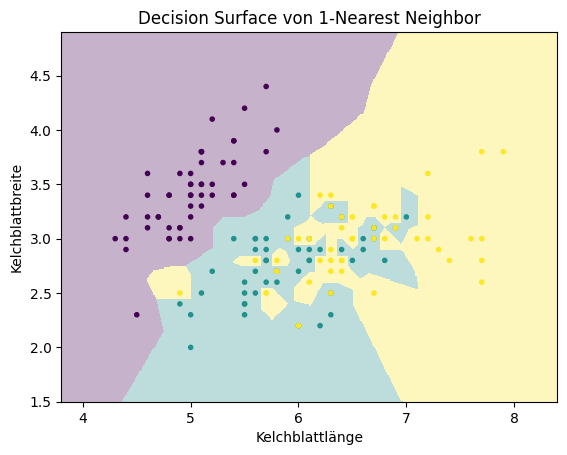

In [2]:
from sklearn.neighbors import KNeighborsClassifier

plot_decision_surface(KNeighborsClassifier(n_neighbors=1), X, Y, title="Decision Surface von 1-Nearest Neighbor")
plt.show()

Wir können dieses Konzept auf $k$ Nachbarn erweitern, um den vollständigen $k$-Nearest-Neighbor-Algorithmus zu erhalten. Hierfür weisen wir der Instanz die Klasse als das Mehrheitsvotum der $k$ nächsten Nachbarn zu. Hierdurch ändern sich auch die Decision Surfaces für verschiedene Werte von $k$.

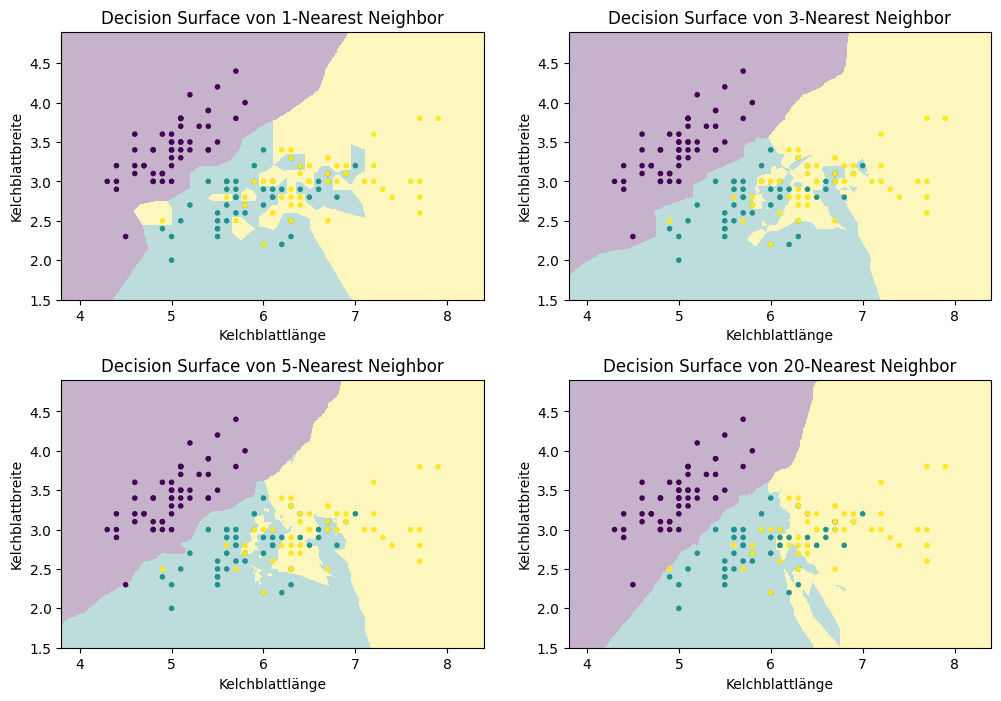

In [3]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(KNeighborsClassifier(n_neighbors=1), X, Y,
                      title="Decision Surface von 1-Nearest Neighbor", ax=axes[0, 0])
plot_decision_surface(KNeighborsClassifier(n_neighbors=3), X, Y,
                      title="Decision Surface von 3-Nearest Neighbor", ax=axes[0, 1])
plot_decision_surface(KNeighborsClassifier(n_neighbors=5), X, Y,
                      title="Decision Surface von 5-Nearest Neighbor", ax=axes[1, 0])
plot_decision_surface(KNeighborsClassifier(n_neighbors=20), X, Y,
                      title="Decision Surface von 20-Nearest Neighbor", ax=axes[1, 1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Man erkennt keine klare Struktur der Decision Boundaries zwischen den Decision Surfaces bei den vom $k$-Nearest Neighbor berechneten Hypothesen. Die Decision Boundaries haben viele scharfe Kanten und keine regelmäßige Struktur, wie man es erwarten würde, wenn diese zum Beispiel das Ergebnis einer differenzierbaren Funktion wären. Genau dies fehlt beim $k$-Nearest-Neighbor-Algorithmus auch: eine mathematische Beschreibung der Hypothese, die eine Generalisierung der Daten ist. Stattdessen haben wir ein *instanzbasiertes* Verfahren, das die Decision Boundaries durch den direkten Vergleich von Instanzen miteinander definiert. Wenn wir betrachten, wie sich das Ergebnis für größere Werte von   verändert, sehen wir, dass der Einfluss einzelner Datenpunkte reduziert wird. Bei $k=1$ sieht man zum Beispiel noch eine einzelne gelbe Instanz an der linken Seite der Grafik. Hierbei handelt es sich vermutlich um einen Ausreißer der gelben Klasse (Virginica). Die Konsequenz dieses Ausreißers ist, dass es eine relativ große gelbe Region gibt, obwohl dieser Bereich eher lila oder türkis sein sollte. Bei größeren Nachbarschaftsgrößen verschwindet dieser Effekt. Andererseits bedeutet eine große Nachbarschaft auch, dass Instanzen, die weiter weg liegen, die Klassifikation beeinflussen. Mit $k=20$ bekommt man hierdurch eine relativ scharfe Trennung von Türkis und Gelb. Dies liegt aber nicht an den Instanzen, die direkt im Bereich der Trennung liegen, sondern an den Instanzen, die weiter im Hintergrund liegen: Sobald es mehr gelbe Punkte im Hintergrund gibt, bleibt die Farbe stabil gelb. Durch diese größeren Abstände kann es jedoch auch eigenartige Effekte geben, wie man es zum Beispiel an der "türkisen Insel" in einem ansonsten stabil gelben Bereich sieht. Das Besondere hier ist, dass es in dieser Insel nicht einmal eine türkise Instanz gibt, sie entsteht also nur aufgrund von Datenpunkten, die relativ weit weg liegen.

Um den Effekt der Nachbarschaftsgröße weiter zu verdeutlichen, betrachten wir den Punkt (6, 3,5) im Detail. 

c:\Users\AndreasWagner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\AndreasWagner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\AndreasWagner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\AndreasWagner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


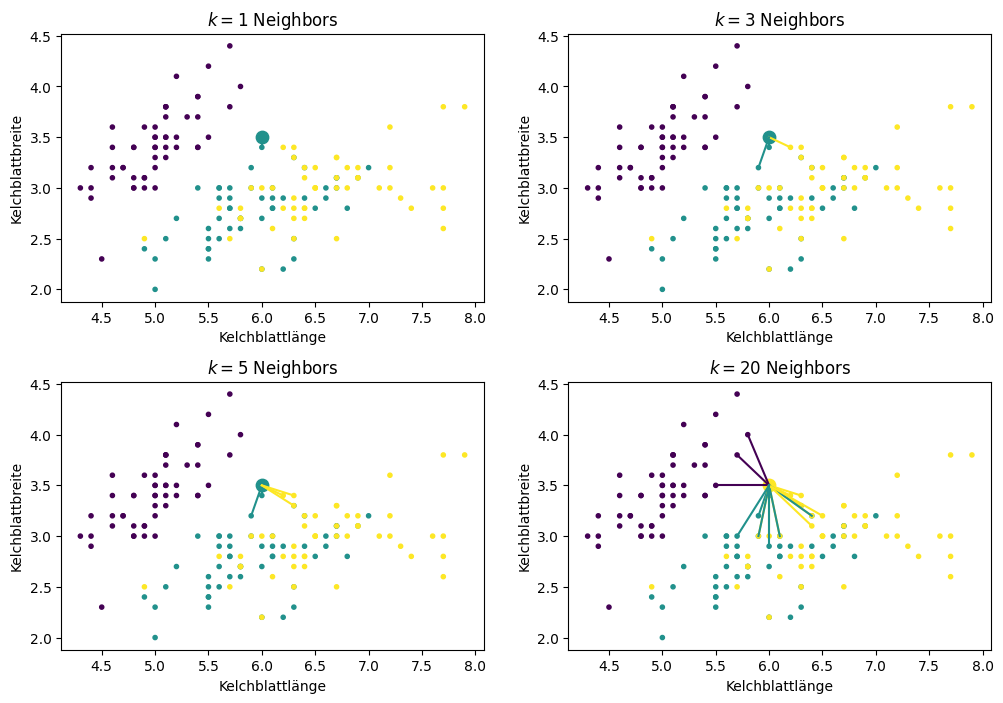

In [4]:
from sklearn.neighbors import NearestNeighbors

def plot_neighborhood(X, Y, k, pnt, ax=None):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    _, pnt_neighbors = nbrs.kneighbors(pnt)
    Y_pred = KNeighborsClassifier(n_neighbors=k).fit(X.values, Y).predict(pnt)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    sc = ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
    for i in range(0,k):
        pnt2 = X.iloc[pnt_neighbors[0][i]].values
        ax.plot([pnt[0][0], pnt2[0]], [pnt[0][1], pnt2[1]], color=sc.to_rgba(Y.iloc[pnt_neighbors[0][i]]))
    ax.scatter(pnt[0][0], pnt[0][1], s=80, color=sc.to_rgba(Y_pred[0]))
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_title('$k=%i$ Neighbors' % k)
    
pnt = [[6, 3.5]]
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_neighborhood(X, Y, 1, pnt, ax=axes[0,0])
plot_neighborhood(X, Y, 3, pnt, ax=axes[0,1])
plot_neighborhood(X, Y, 5, pnt, ax=axes[1,0])
plot_neighborhood(X, Y, 20, pnt, ax=axes[1,1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Bei $k=1$ und $k=3$ wird dieser Punkt türkis markiert, da es zwei relativ nahe türkise Datenpunkte gibt, jedoch nur einen gelben. Bei $k=5$ wechselt der Punkt zur gelben Klasse, da es jetzt zwei weitere gelbe Punkte in der Nachbarschaft gibt. Bei $k=20$ sieht man, wie der Punkt zwar gelb bleibt, aber sehr viele Punkte mittlerweile mitbestimmen, obwohl die meisten davon sehr weit weg von unserem Datenpunkt liegen.